In [1]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = uproot.open("/lustre/cms/store/user/adiflori/jpsikk_DataRunII_UltraLegacy_miniAODv2_v1_m4To6/Charmonium/crab_Charmonium_Run2018D-UL2018_MiniAODv2-v1_MINIAOD__1SKK_20220512_114449/220512_094551/0000/rootuple.root")
print(file.classnames())

{'rootuple;1': 'TDirectory', 'rootuple/CandidateTree;1': 'TTree', 'rootuple/UpsTree;1': 'TTree'}


In [3]:
#file["rootuple"]["CandidateTree"].arrays(library="pd").to_hdf("raw/data.h5", key="candidate")
#file["rootuple"]["UpsTree"].arrays(library="pd").to_hdf("raw/data.h5", key="ups")

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [4]:
ups_data = pd.read_hdf("raw/data.h5", key="ups")
candidate_data = pd.read_hdf("raw/data.h5", key="candidate")

In [5]:
file["rootuple"]["CandidateTree"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | int32_t                  | AsDtype('>i4')
event                | int32_t                  | AsDtype('>i4')
nCandPerEvent        | int32_t                  | AsDtype('>i4')
numPrimaryVertices   | int32_t                  | AsDtype('>i4')
trigger              | int32_t                  | AsDtype('>i4')
candidate_p4         | TLorentzVector           | AsStridedObjects(Model_TLor...
track1_p4            | TLorentzVector           | AsStridedObjects(Model_TLor...
track2_p4            | TLorentzVector           | AsStridedObjects(Model_TLor...
ditrack_p4           | TLorentzVector           | AsStridedObjects(Model_TLor...
dimuon_p4            | TLorentzVector           | AsStridedObjects(Model_TLor...
muonp_p4             | TLorentzVector           | AsStridedObjects(Model_TLor...
muonn_p4             | TLor

In [6]:
cut = (candidate_data['candidate_charge'] == 0)\
    & (abs(candidate_data['candidate_cosAlpha']) > 0.99)\
    & (candidate_data['candidate_lxy'] / candidate_data['candidate_lxyErr'] > 3.0)\
    & (candidate_data['candidate_vProb'] > 0.05)\
    & (candidate_data['ditrack_mass'] > 1.014) & (candidate_data['ditrack_mass'] < 1.024)

<AxesSubplot:>

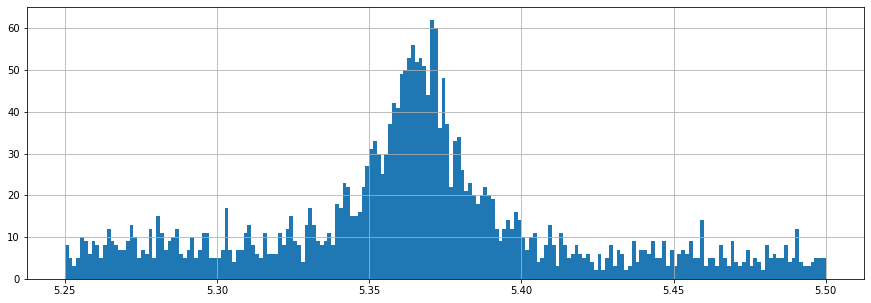

In [7]:
candidate_data[cut]['candidate_vMass'].hist(bins=200, figsize=(15, 5), range=(5.25, 5.5))
#candidate_data[-cut]['candidate_vMass'].hist(bins=200, figsize=(15, 5), histtype="step", range=(5.25, 5.5))

In [8]:
#candidate_data[cut]['candidate_vMass'].plot(kind='kde', figsize=(15, 5))


<AxesSubplot:>

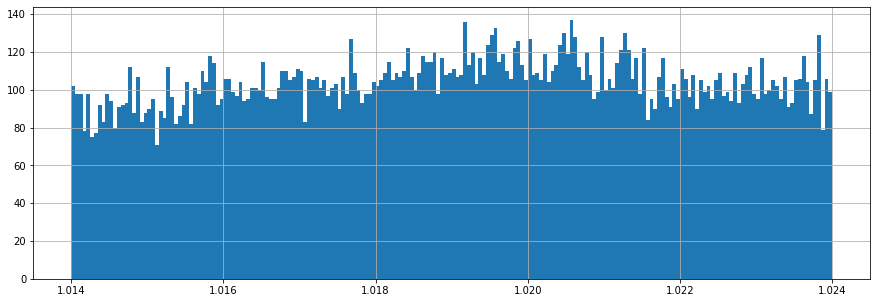

In [9]:
candidate_data[cut]['ditrack_mass'].hist(bins=200, figsize=(15, 5))
#candidate_data[-cut]['ditrack_mass'].hist(bins=200, figsize=(15, 5), histtype="step")